In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report

In [11]:
crop_data = pd.read_csv('Crop_Data.csv')
crop_data.head()

,temperature,humidity,ph,water availability,season,label,Country,harvest season
0,20.879744,82.002744,6.502985,202.935536,rainy,rice,Nigeria,spring
1,21.770462,80.319644,7.038096,226.655537,rainy,rice,Nigeria,winter
2,23.004459,82.320763,7.840207,263.964248,rainy,rice,Nigeria,rainy
3,26.491096,80.158363,6.980401,242.864034,rainy,rice,Nigeria,rainy
4,20.130175,81.604873,7.628473,262.717340,rainy,rice,Nigeria,spring


In [12]:
crop_data.shape

(1400, 8)

In [13]:
crop_data.isna().sum()

temperature           0
humidity              0
ph                    0
water availability    0
season                0
label                 0
Country               0
harvest season        0
dtype: int64

In [14]:
crop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   temperature         1400 non-null   float64
 1   humidity            1400 non-null   float64
 2   ph                  1400 non-null   float64
 3   water availability  1400 non-null   float64
 4   season              1400 non-null   object 
 5   label               1400 non-null   object 
 6   Country             1400 non-null   object 
 7   harvest season      1400 non-null   object 
dtypes: float64(4), object(4)
memory usage: 87.6+ KB


In [15]:
crop_data.duplicated().sum()

0

In [16]:
crop_data.describe()

,temperature,humidity,ph,water availability
count,1400.000000,1400.000000,1400.000000,1400.000000
mean,24.971621,64.611062,6.565246,91.784651
std,4.081622,22.753785,0.835101,58.682258
min,15.330426,14.258040,3.504752,20.211267
25%,22.178239,56.824217,6.068795,51.546542
50%,25.140245,68.288321,6.524478,72.379183
75%,27.963227,82.710409,7.042343,107.428334
max,36.977944,94.962187,9.935091,298.560117


In [17]:
crop_data['season'].value_counts()

rainy     600
winter    400
summer    300
spring    100
Name: season, dtype: int64

In [18]:
crop_data['harvest season'].value_counts()

spring    367
summer    358
rainy     346
winter    329
Name: harvest season, dtype: int64

In [19]:
crop_data['Country'].value_counts()

Nigeria         713
South Africa    468
Kenya           155
Sudan            64
Name: Country, dtype: int64

In [20]:
crop_data['label'].value_counts()

maize          200
rice           100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
watermelon     100
muskmelon      100
cotton         100
jute           100
Name: label, dtype: int64

In [21]:
crop_data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'watermelon',
       'muskmelon', 'cotton', 'jute'], dtype=object)

In [22]:
model_data = crop_data.copy()

In [23]:
model_data.head()

,temperature,humidity,ph,water availability,season,label,Country,harvest season
0,20.879744,82.002744,6.502985,202.935536,rainy,rice,Nigeria,spring
1,21.770462,80.319644,7.038096,226.655537,rainy,rice,Nigeria,winter
2,23.004459,82.320763,7.840207,263.964248,rainy,rice,Nigeria,rainy
3,26.491096,80.158363,6.980401,242.864034,rainy,rice,Nigeria,rainy
4,20.130175,81.604873,7.628473,262.717340,rainy,rice,Nigeria,spring


In [24]:
features = model_data.drop(['harvest season'], axis=1)
features.head()

,temperature,humidity,ph,water availability,season,label,Country
0,20.879744,82.002744,6.502985,202.935536,rainy,rice,Nigeria
1,21.770462,80.319644,7.038096,226.655537,rainy,rice,Nigeria
2,23.004459,82.320763,7.840207,263.964248,rainy,rice,Nigeria
3,26.491096,80.158363,6.980401,242.864034,rainy,rice,Nigeria
4,20.130175,81.604873,7.628473,262.717340,rainy,rice,Nigeria


In [25]:
encoder = LabelEncoder()

cat_columns = features.select_dtypes(include=['object'])
for col in cat_columns:
    features[col] = encoder.fit_transform(features[col])

In [26]:
features.head()

,temperature,humidity,ph,water availability,season,label,Country
0,20.879744,82.002744,6.502985,202.935536,0,11,1
1,21.770462,80.319644,7.038096,226.655537,0,11,1
2,23.004459,82.320763,7.840207,263.964248,0,11,1
3,26.491096,80.158363,6.980401,242.864034,0,11,1
4,20.130175,81.604873,7.628473,262.717340,0,11,1


In [27]:
features['season'].value_counts()

0    600
3    400
2    300
1    100
Name: season, dtype: int64

In [28]:
y = model_data['harvest season'].replace({'rainy' : 0, 'spring':1, 'summer':2, 'winter':3})


In [29]:
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1120, 7) (280, 7) (1120,) (280,)


In [30]:
scaler = StandardScaler()

scaledX_train = scaler.fit_transform(X_train)
scaledX_test = scaler.transform(X_test)

In [31]:
log = LogisticRegression()

log.fit(scaledX_train, y_train)

LogisticRegression()

In [32]:
pred_log = log.predict(scaledX_test)

In [33]:
pred_log

array([1, 2, 0, 1, 1, 1, 3, 1, 2, 1, 1, 0, 1, 2, 0, 2, 2, 2, 1, 1, 1, 2,
       2, 2, 0, 1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 3,
       1, 0, 1, 2, 1, 2, 1, 3, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 0, 2, 1, 2, 0, 2, 2, 1, 1, 3, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       3, 3, 1, 1, 1, 1, 2, 1, 0, 2, 1, 1, 2, 1, 2, 1, 3, 2, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 2, 0, 1, 2, 2, 2, 2, 3, 1, 1, 2, 2, 1, 0, 0, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 1, 2, 3, 3,
       3, 2, 1, 1, 2, 1, 2, 0, 2, 1, 2, 0, 1, 2, 2, 2, 2, 1, 2, 3, 1, 1,
       0, 1, 2, 2, 1, 1, 1, 2, 1, 0, 0, 0, 2, 1, 1, 0, 2, 1, 3, 1, 3, 2,
       1, 1, 2, 0, 1, 0, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 0, 2, 1, 3, 1,
       2, 2, 1, 2, 1, 3, 2, 1, 2, 1, 2, 2, 3, 1, 1, 1, 1, 2, 2, 2, 3, 3,
       2, 2, 2, 2, 2, 2, 3, 0, 1, 0, 2, 1, 1, 3, 2, 2, 3, 1, 2, 2, 2, 0,
       1, 1, 2, 1, 0, 1, 2, 2, 1, 1, 1, 2, 2, 0, 2, 2], dtype=int64)

In [34]:
accuracy_score(y_test, pred_log)

0.26071428571428573

In [35]:
print(classification_report(y_test, pred_log))

              precision    recall  f1-score   support

           0       0.28      0.11      0.16        74
           1       0.29      0.42      0.34        77
           2       0.25      0.45      0.32        64
           3       0.17      0.06      0.09        65

    accuracy                           0.26       280
   macro avg       0.25      0.26      0.23       280
weighted avg       0.25      0.26      0.23       280



In [36]:
forest = RandomForestClassifier(random_state=6)

forest.fit(scaledX_train, y_train)

RandomForestClassifier(random_state=6)

In [37]:
pred_forest = forest.predict(scaledX_test)

In [38]:
forest.score(scaledX_train, y_train)

1.0

In [39]:
accuracy_score(y_test, pred_forest)

0.3

In [40]:
print(classification_report(y_test, pred_forest))

              precision    recall  f1-score   support

           0       0.41      0.39      0.40        74
           1       0.23      0.23      0.23        77
           2       0.32      0.39      0.35        64
           3       0.22      0.18      0.20        65

    accuracy                           0.30       280
   macro avg       0.30      0.30      0.30       280
weighted avg       0.30      0.30      0.30       280



In [41]:
# Define the number of splits for cross-validation (e.g., 5-fold cross-validation)
num_splits = 5
kfold = KFold(n_splits=num_splits, shuffle=True, random_state=42)

# Perform cross-validation and print the accuracy for each fold
cv_results = cross_val_score(forest, features, y, cv=kfold, scoring='accuracy')

In [42]:
np.mean(cv_results)

0.2657142857142857

In [43]:
X_test

,temperature,humidity,ph,water availability,season,label,Country
547,30.992569,43.021514,8.034413,58.276007,2,7,2
754,33.953091,69.961000,7.423530,61.163505,3,0,1
1283,24.712525,77.729311,7.979090,85.249633,3,2,2
1128,27.723383,90.938979,6.698469,22.818634,2,9,1
1063,25.832029,89.004817,6.755192,45.246906,2,12,2
...,...,...,...,...,...,...,...
664,29.129395,88.483126,7.085982,36.450128,0,8,1
764,30.640958,61.145086,7.167436,71.369475,3,0,1
239,18.811981,15.216182,6.206582,77.542942,3,1,2
616,27.864013,80.451314,6.852885,42.830539,0,8,1


In [44]:
boost = XGBClassifier(random_state=5)

boost.fit(scaledX_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [45]:
pred_boost = boost.predict(scaledX_test)

In [46]:
boost.score(scaledX_test, y_test)

0.22142857142857142

In [47]:
pred_boost

array([1, 2, 3, 2, 2, 2, 3, 0, 0, 2, 2, 0, 1, 0, 3, 3, 3, 2, 1, 1, 3, 2,
       2, 0, 0, 1, 2, 0, 1, 0, 3, 0, 2, 1, 0, 2, 0, 2, 2, 0, 2, 1, 2, 3,
       1, 1, 1, 0, 2, 3, 0, 2, 0, 1, 1, 1, 1, 3, 2, 3, 2, 1, 1, 1, 2, 1,
       3, 1, 0, 0, 2, 3, 2, 2, 2, 1, 0, 1, 3, 1, 2, 1, 1, 0, 1, 1, 3, 0,
       3, 1, 3, 0, 0, 3, 3, 0, 2, 2, 3, 2, 0, 0, 0, 2, 3, 1, 2, 0, 0, 3,
       3, 0, 0, 0, 1, 0, 3, 1, 0, 0, 2, 3, 3, 1, 2, 0, 2, 0, 2, 3, 0, 1,
       2, 1, 1, 2, 0, 2, 1, 3, 3, 2, 3, 3, 0, 3, 0, 2, 3, 0, 1, 1, 1, 3,
       0, 3, 0, 0, 2, 0, 2, 2, 0, 3, 0, 2, 1, 0, 2, 2, 1, 1, 0, 1, 1, 3,
       0, 1, 0, 0, 1, 0, 2, 0, 2, 2, 3, 2, 0, 1, 3, 1, 1, 3, 2, 1, 3, 1,
       3, 1, 0, 0, 2, 1, 0, 2, 2, 0, 0, 2, 3, 1, 2, 1, 1, 0, 3, 2, 0, 0,
       1, 2, 0, 1, 2, 0, 1, 2, 2, 3, 1, 2, 2, 0, 3, 3, 1, 2, 0, 0, 3, 0,
       0, 3, 0, 1, 1, 2, 1, 2, 3, 2, 1, 0, 2, 2, 1, 3, 0, 2, 3, 3, 2, 0,
       1, 0, 1, 0, 2, 0, 2, 3, 2, 0, 2, 3, 1, 2, 1, 2], dtype=int64)

In [48]:
accuracy_score(y_test, pred_boost)

0.22142857142857142

In [49]:
importance = list(forest.feature_importances_)

feature = list(X_train.columns)
feature_importance = list(zip(feature, importance))
feature_importance_df = pd.DataFrame(feature_importance, columns=['Feature', 'Importance']).sort_values(ascending = False, by= 'Importance')
feature_importance_df

,Feature,Importance
2,ph,0.221741
0,temperature,0.220938
3,water availability,0.216439
1,humidity,0.215178
6,Country,0.055501
5,label,0.043185
4,season,0.027018


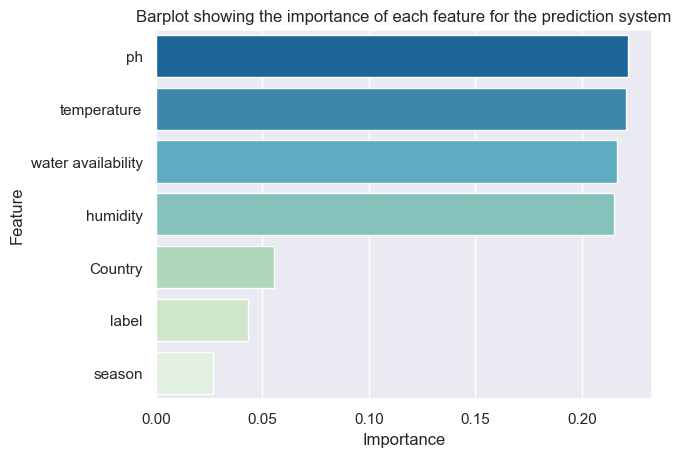

In [50]:
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='GnBu_r')
plt.title('Barplot showing the importance of each feature for the prediction system')

plt.show()

In [51]:
import pickle


# Specify the file path where you want to save the model
save_path = "model.pkl"

# Save the model as a pickle file
with open(save_path, 'wb') as file:
    pickle.dump(forest, file)

print("Model saved as pickle file.")

Model saved as pickle file.


In [52]:

# Specify the file path where you want to save the model
save_path = "scaler.pkl"

# Save the model as a pickle file
with open(save_path, 'wb') as file:
    pickle.dump(scaler, file)

print("Scaler saved as pickle file.")

Scaler saved as pickle file.


In [53]:

# Specify the file path where you want to save the model
save_path = "encoder.pkl"

# Save the model as a pickle file
with open(save_path, 'wb') as file:
    pickle.dump(encoder, file)

print("Encoder saved as pickle file.")

Encoder saved as pickle file.
